# Your Uni: kem2231
# Your AI Model Share Username: kem2231
# Your Full name: Kate McGrath
# Link to your Public Github repository with Final report: https://github.com/katemcg/advanced_ml/tree/main/hw1

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Share your models to a centralized leaderboard
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



## 0. Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [1]:
# Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [2]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1) ## Examine what this does and write in next cell

X_train.head()
y_train_labels.head()
# y_train.head()

0      Average
1         High
2      Average
3    Very High
4         High
dtype: object

##  Add new data

In [3]:
# Truncated and cleaned up region data to merge (Week 4 folder)
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [4]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.

X_train = X_train.merge(countrydata, left_on='Country or region', right_on='country_name', how='left')
X_test = X_test.merge(countrydata, left_on='Country or region', right_on='country_name', how='left')


# EDA

Find out the number and percentage of missing values in the table per column

In [5]:
# Your code here:
print("count null by col:")
print(X_train.isnull().sum())

print("\npercent null by col:")
print(round(X_train.isnull().sum() * 100 / len(X_train), 3))

count null by col:
Country or region                 0
GDP per capita                    0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         0
name                              0
region                            0
sub-region                        0
Terrorist_attacks                 0
country_name                      6
population                        6
population_below_poverty_line    15
hdi                               6
life_expectancy                   6
expected_years_of_schooling       6
mean_years_of_schooling           6
gni                               6
dtype: int64

percent null by col:
Country or region                 0.000
GDP per capita                    0.000
Social support                    0.000
Healthy life expectancy           0.000
Freedom to make life choices      0.000
Generosity                        0.000
Perceptions of corrupt

Plot the frequency distribution / histogram of some of the numerical features that you think are important

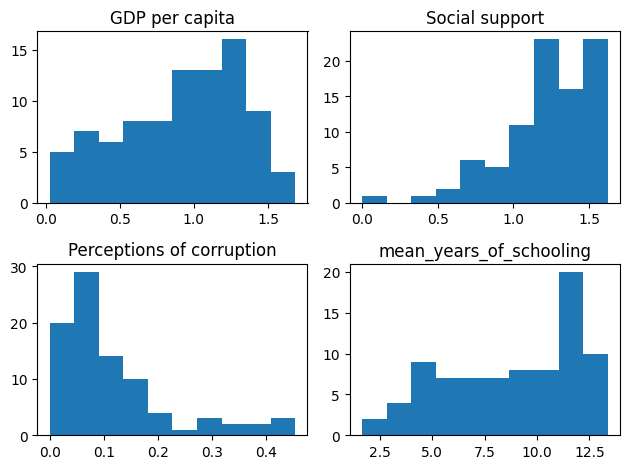

In [6]:
import matplotlib.pyplot as plt

# Your plotting code here:

plt.subplot(2, 2, 1)
plt.title("GDP per capita")
plt.hist(X_train["GDP per capita"])

plt.subplot(2, 2, 2)
plt.title("Social support")
plt.hist(X_train["Social support"])

plt.subplot(2, 2, 3)
plt.title("Perceptions of corruption")
plt.hist(X_train["Perceptions of corruption"])

plt.subplot(2, 2, 4)
plt.title("mean_years_of_schooling")
plt.hist(X_train["mean_years_of_schooling"])

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

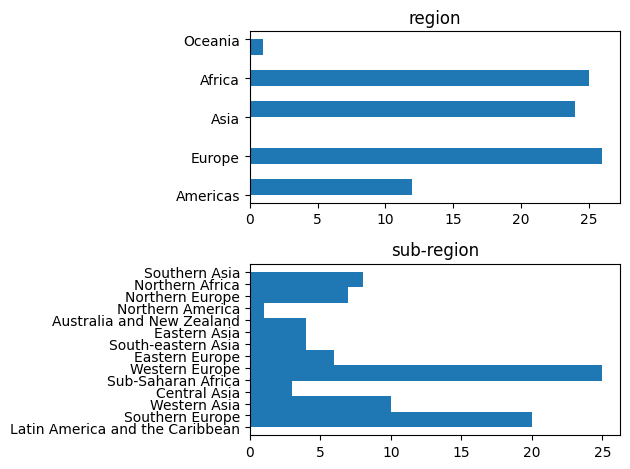

In [7]:
# Your plotting code here:

# "Country or region", "name", and "country_name", each value is unique

plt.subplot(2, 1, 1)
plt.title("region")
plt.hist(X_train["region"], orientation="horizontal")

plt.subplot(2, 1, 2)
plt.title("sub-region")
plt.hist(X_train["sub-region"], orientation="horizontal")

plt.tight_layout()
plt.show()

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

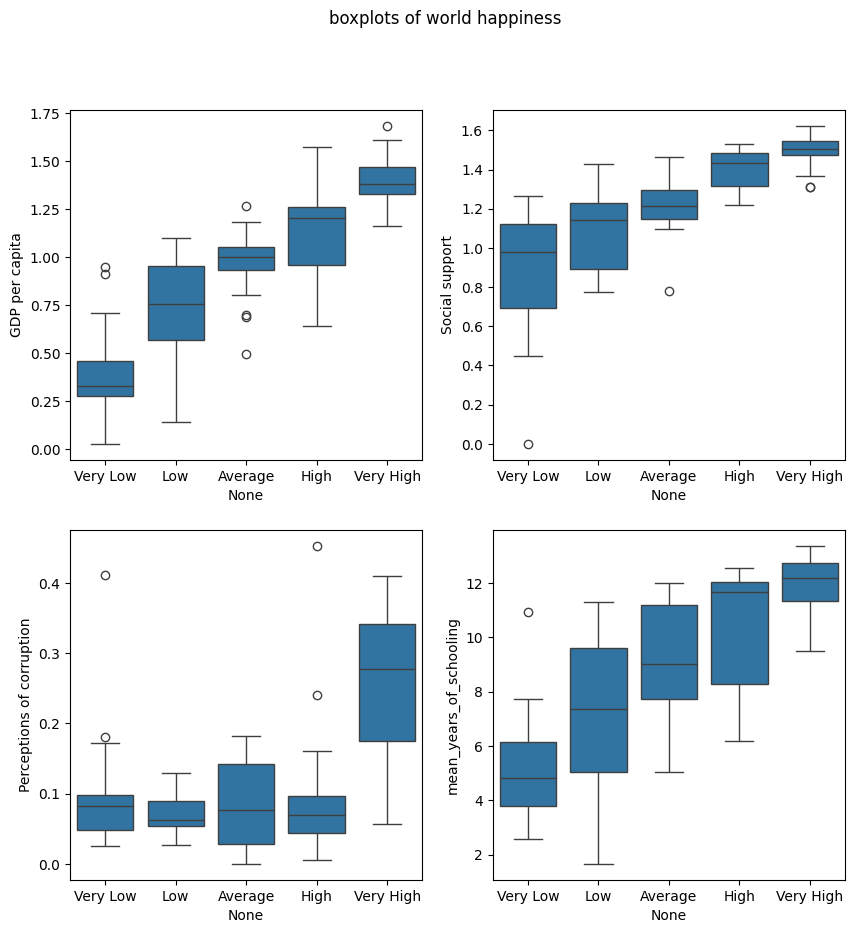

In [9]:
# Your plotting code(s) here:

import seaborn as sns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

order = ["Very Low", "Low", "Average", "High", "Very High"]

# seeing how the vars I chose above interact with the target var y
sns.boxplot(x=y_train_labels, y=X_train["GDP per capita"], ax=axs[0][0], order=order)
sns.boxplot(x=y_train_labels, y=X_train["Social support"], ax=axs[0][1], order=order)
sns.boxplot(x=y_train_labels, y=X_train["Perceptions of corruption"], ax=axs[1][0], order=order)
sns.boxplot(x=y_train_labels, y=X_train["mean_years_of_schooling"], ax=axs[1][1], order=order)

fig.suptitle("boxplots of world happiness")
plt.show()

In [ ]:
# I focused on visualizing GDP per capita, social support, perceptions of corruption,
  # and mean years of schooling. besides perceptions of corruption, these all seem
  # to be strongly correlated with the target variable. Looking at the correlation table,
  # freedom to make life choices and genoristy also seem to be tied.

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=['int64', 'float64']) ## Drop all the non-numerical features from X_train
numeric_features = numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

In [11]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

##3. Fit model on preprocessed data and save preprocessor function and model


In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=4)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.

print("forest train set score: {:.3f}".format(model.score(preprocessor(X_train), y_train_labels)))

# Your cell should have a score between 0-1 as output

forest train set score: 0.909


In [13]:
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

In [14]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

# increased n_estimators from 200 to 500, max_depth from 4 to 8
model_2 = RandomForestClassifier(n_estimators=500, max_depth=8)
model_2.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.

print("forest train set score: {:.3f}".format(model_2.score(preprocessor(X_train), y_train_labels)))

forest train set score: 1.000


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer : increased n_estimators from 200 to 500, max_depth from 4 to 8.
  # n_estimators is the number of trees that the model generates -- adding more trees
    # means we can better learn the data, but it is also more time consuming and
    # runs the risk of overfitting.
  # max_depth is the number of times internal nodes are split, and the deeper the tree,
    # the more information there is to be learned.
  # so by increasing both these params, we have a more nuanced model that has improved
    # its performance.

In [15]:
#-- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(preprocessor(X_test)) # Predict

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

# using grid search cv to choose magnitude of...
# number of trees, max depth, max features, and criterion
# commented out options because it takes so long, tested one by one
param_grid = {
    'n_estimators': np.arange(200, 500, 100),
    'max_depth' : np.arange(2, 10, 2),
    'max_features': ['sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

# fitting the model and choosing best params
gridmodel = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=10) ## Define a Random Forest Model here, fit it, and score it
gridmodel.fit(preprocessor(X_train), y_train_labels)

# the chosen params are n_est=200, max_depth=8, max_features=log2, criterion=gini
print("best forest params: {}".format(gridmodel.best_params_))
print("forest train set score: {:.3f}".format(gridmodel.score(preprocessor(X_train), y_train_labels)))
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))

best forest params: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
forest train set score: 1.000
best mean cross-validation score: 0.693


In [ ]:
prediction_labels = gridmodel.predict(preprocessor(X_test)) # Predict

In [17]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# using grid search cv to choose magnitude of C, gamma
param_grid = {
    'kernel': ['rbf', 'linear'],
    'C': [1, 5, 10, 50],
    'gamma': [0.0001, 0.0005, 0.001, 0.005]
}

# fitting the model and choosing best params
svm = GridSearchCV(SVC(), param_grid=param_grid, cv=10)

# defining the best model
svm.fit(preprocessor(X_train), y_train_labels)

# the chosen params are C=50, gamma=0.005, and kernel=rbf
print("best svm params: {}".format(svm.best_params_))
print("svm train set score: {:.3f}".format(svm.score(preprocessor(X_train), y_train_labels)))
print("best svm mean cross-validation score: {:.3f}".format(svm.best_score_))

best svm params: {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
svm train set score: 0.807
best svm mean cross-validation score: 0.694


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer: I used SVC (support vector classifier), and ran grid search for to
  # choose the params for kernel, C, and gamma. the kernel type chosen was rbf, the
  # default. C is the regularization parameter, and is chosen to be 50 -- because C
  # is large, it means that the classifier is penalized for misclassified data, and
  # will try to avoid it. lastly, gamma is the kernel coefficient, the smallest option
  # chosen as the best.
# I chose to use the support vector method because it is known to be good with smaller
  # data sets, such as this, and it is a very flexible model that can learn a lot.
  # using this method gave a train set score of 0.807, and a mean cross val score of
  # 0.694. this is slightly higher than the previous method using random forest, but
  # it still does not reach my highest ranking on the leaderboard.

# 6. Basic Deep Learning

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count = preprocessor(X_test).shape[1] #count features in input data

keras_model = Sequential([ ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)
    Dense(128, input_dim=feature_count),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(64),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(5),
    Activation('softmax'),
])

#Use Softmax activation in last layer. How many neurons should there be in the last layer?
  # there should be 5 neurons in the last layer because there are 5 categories in
  # y, the target variable (very low, low, average, high, very high)

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_hist = keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
                       batch_size = 20,
                       epochs = 300, validation_split=0.25)

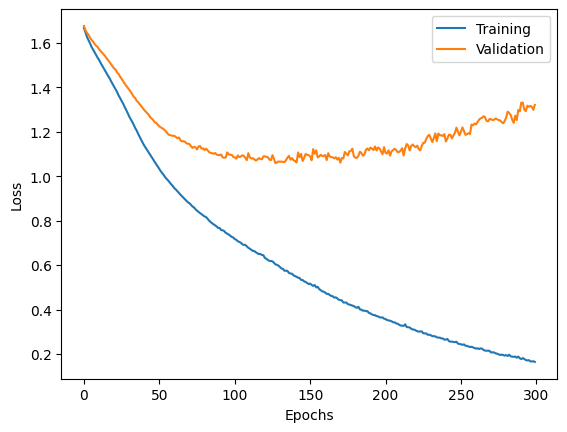

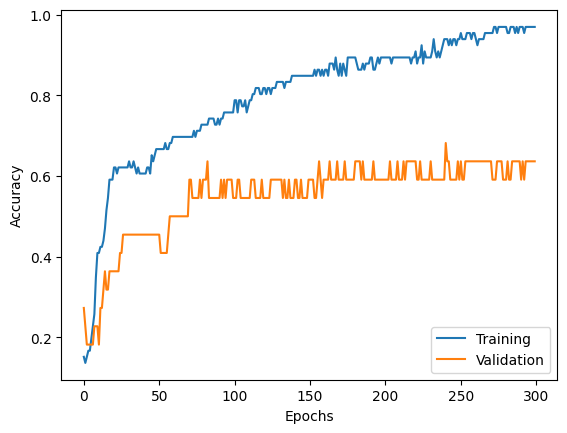

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(keras_hist.history['loss'])
plt.plot(keras_hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(keras_hist.history['accuracy'])
plt.plot(keras_hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'], loc='lower right')

In [ ]:
#-- Generate predicted y values

#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index = keras_model.predict(preprocessor(X_test)).argmax(axis=1) # Predict